# Imports

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Results

## Load Data

In [16]:
results = pd.read_csv('./datasets/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


## Results Dataset

In [17]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47379 entries, 0 to 47378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47379 non-null  object 
 1   home_team   47354 non-null  object 
 2   away_team   47354 non-null  object 
 3   home_score  47295 non-null  float64
 4   away_score  47295 non-null  float64
 5   tournament  47379 non-null  object 
 6   city        47379 non-null  object 
 7   country     47379 non-null  object 
 8   neutral     47379 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [22]:
america_cup_2024_countries = ['Argentina', 'Peru', 'Chile', 'Canada', 'Mexico', 
                              'Ecuador', 'Venezuela', 'Jamaica', 'United States', 
                              'Uruguay', 'Panama', 'Bolivia', 'Brazil', 'Colombia', 
                              'Costa Rica', 'Paraguay']
results = results[results['home_team'].isin(america_cup_2024_countries) & results['away_team'].isin(america_cup_2024_countries)]
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43294,2020-02-01,United States,Costa Rica,1.0,0.0,Friendly,Carson,United States,False
43372,2020-10-08,Paraguay,Peru,2.0,2.0,FIFA World Cup qualification,Asunción,Paraguay,False
43373,2020-10-08,Uruguay,Chile,2.0,1.0,FIFA World Cup qualification,Montevideo,Uruguay,False
43374,2020-10-08,Argentina,Ecuador,1.0,0.0,FIFA World Cup qualification,Buenos Aires,Argentina,False
43392,2020-10-09,Colombia,Venezuela,3.0,0.0,FIFA World Cup qualification,Barranquilla,Colombia,False
43393,2020-10-09,Brazil,Bolivia,5.0,0.0,FIFA World Cup qualification,São Paulo,Brazil,False
43402,2020-10-10,Costa Rica,Panama,0.0,1.0,Friendly,San José,Costa Rica,False
43441,2020-10-13,Costa Rica,Panama,0.0,1.0,Friendly,San José,Costa Rica,False
43448,2020-10-13,Bolivia,Argentina,1.0,2.0,FIFA World Cup qualification,La Paz,Bolivia,False
43449,2020-10-13,Ecuador,Uruguay,4.0,2.0,FIFA World Cup qualification,Quito,Ecuador,False


In [21]:
#get the rows that are between 2024-06-18 and 2020-01-01
results = results[(results['date'] >= '2020-01-01') & (results['date'] <= '2024-06-18')]
results.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47234,2024-06-11,Chile,Paraguay,3.0,0.0,Friendly,Santiago,Chile,False
47278,2024-06-12,Ecuador,Bolivia,3.0,1.0,Friendly,Chester,United States,True
47279,2024-06-12,United States,Brazil,1.0,1.0,Friendly,Orlando,United States,False
47286,2024-06-15,Colombia,Bolivia,3.0,0.0,Friendly,Denver,United States,True
47292,2024-06-16,Panama,Paraguay,0.0,1.0,Friendly,Panama City,Panama,False


In [25]:
#change the float values to int
results['home_score'] = results['home_score'].astype(int)
results['away_score'] = results['away_score'].astype(int)
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43294,2020-02-01,United States,Costa Rica,1,0,Friendly,Carson,United States,False
43372,2020-10-08,Paraguay,Peru,2,2,FIFA World Cup qualification,Asunción,Paraguay,False
43373,2020-10-08,Uruguay,Chile,2,1,FIFA World Cup qualification,Montevideo,Uruguay,False
43374,2020-10-08,Argentina,Ecuador,1,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
43392,2020-10-09,Colombia,Venezuela,3,0,FIFA World Cup qualification,Barranquilla,Colombia,False


## Data Analysis

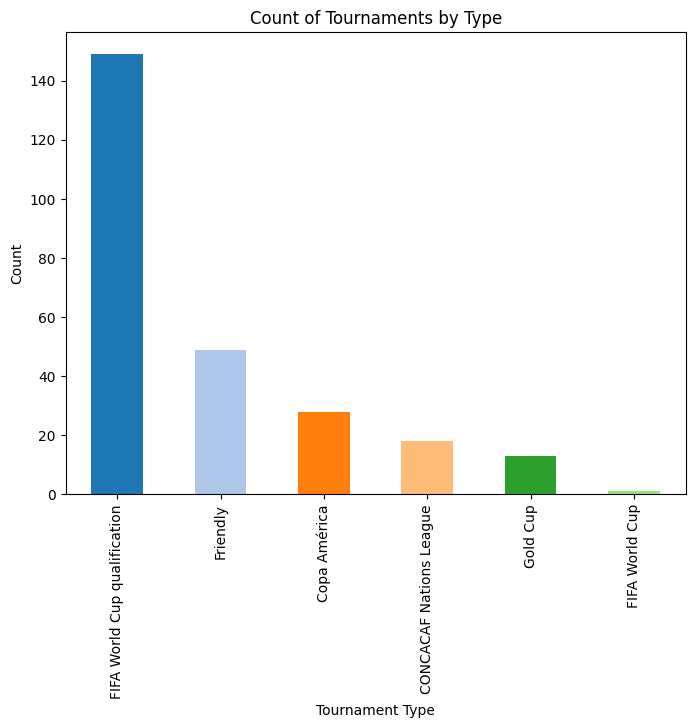

In [31]:
tournament_counts = results['tournament'].value_counts()


plt.figure(figsize=(8, 6))
colors = plt.cm.tab20.colors[:len(tournament_counts)]
tournament_counts.plot(kind='bar', color=colors)
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Count of Tournaments by Type')
plt.xticks(rotation=90)
plt.show()



# Rank

In [3]:
rank = pd.read_csv('./datasets/fifa_ranking-2024-04-04.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,83.0,Guatemala,GUA,15.0,0.0,83,CONCACAF,1992-12-31
1,32.0,Zambia,ZAM,38.0,0.0,32,CAF,1992-12-31
2,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.0,0.0,34,UEFA,1992-12-31
4,35.0,Colombia,COL,36.0,0.0,35,CONMEBOL,1992-12-31


In [4]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67261 entries, 0 to 67260
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             67253 non-null  float64
 1   country_full     67261 non-null  object 
 2   country_abrv     67261 non-null  object 
 3   total_points     67261 non-null  float64
 4   previous_points  67261 non-null  float64
 5   rank_change      67261 non-null  int64  
 6   confederation    67261 non-null  object 
 7   rank_date        67261 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.1+ MB


In [5]:
america_cup_2024_countries = ['Argentina', 'Peru', 'Chile', 'Canada', 'Mexico', 
                              'Ecuador', 'Venezuela', 'Jamaica', 'United States', 
                              'Uruguay', 'Panama', 'Bolivia', 'Brazil', 'Colombia', 
                              'Costa Rica', 'Paraguay']
rank = rank[rank['country_full'].isin(america_cup_2024_countries)]
rank.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
4,35.0,Colombia,COL,36.0,0.0,35,CONMEBOL,1992-12-31
6,37.0,Costa Rica,CRC,35.0,0.0,37,CONCACAF,1992-12-31
16,47.0,Chile,CHI,28.0,0.0,47,CONMEBOL,1992-12-31
29,3.0,Brazil,BRA,56.0,0.0,3,CONMEBOL,1992-12-31
36,10.0,Argentina,ARG,51.0,0.0,10,CONMEBOL,1992-12-31
42,16.0,Uruguay,URU,48.0,0.0,16,CONMEBOL,1992-12-31
51,25.0,Mexico,MEX,43.0,0.0,25,CONCACAF,1992-12-31
56,57.0,Canada,CAN,25.0,0.0,57,CONCACAF,1992-12-31
84,87.0,Bolivia,BOL,14.0,0.0,87,CONMEBOL,1992-12-31
91,65.0,Ecuador,ECU,23.0,0.0,65,CONMEBOL,1992-12-31


In [6]:
#get the rows that are between 2024-06-18 and 2020-01-01
rank = rank[(rank['rank_date'] >= '2020-01-01') & (rank['rank_date'] <= '2024-06-18')]
rank.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
67139,45.0,Panama,PAN,1475.62,1475.62,1,CONCACAF,2024-04-04
67142,42.0,Chile,CHI,1491.71,1489.82,0,CONMEBOL,2024-04-04
67152,32.0,Peru,PER,1515.82,1512.68,-1,CONMEBOL,2024-04-04
67153,56.0,Paraguay,PAR,1430.73,1430.73,0,CONMEBOL,2024-04-04
67260,5.0,Brazil,BRA,1788.65,1784.09,0,CONMEBOL,2024-04-04


In [9]:
rank.rank_date = rank.rank_date.apply(lambda x: x.replace("2024-04-04", datetime.today().strftime('%Y-%m-%d')))
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
67139,45.0,Panama,PAN,1475.62,1475.62,1,CONCACAF,2024-06-18
67142,42.0,Chile,CHI,1491.71,1489.82,0,CONMEBOL,2024-06-18
67152,32.0,Peru,PER,1515.82,1512.68,-1,CONMEBOL,2024-06-18
67153,56.0,Paraguay,PAR,1430.73,1430.73,0,CONMEBOL,2024-06-18
67260,5.0,Brazil,BRA,1788.65,1784.09,0,CONMEBOL,2024-06-18


In [12]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
rank.tail(20)

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
23695,2024-05-30,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23696,2024-05-31,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23697,2024-06-01,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23698,2024-06-02,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23699,2024-06-03,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23700,2024-06-04,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23701,2024-06-05,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23702,2024-06-06,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23703,2024-06-07,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
23704,2024-06-08,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL


In [ ]:
df_ranked = results.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
df_ranked = df_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)


In [ ]:
df_ranked.to_csv(".datasets/created/data_rank.csv", index=False)
